# **1. Perkenalan Dataset**


Dataset Customers.csv memiliki kolom-kolom berikut:

- CustomerID: ID unik setiap pelanggan.
- Gender: Jenis kelamin pelanggan (Male/Female).
- Age: Usia pelanggan.
- Annual Income ($): Pendapatan tahunan pelanggan dalam dolar.
- Spending Score (1-100): Skor pengeluaran pelanggan.
- Profession: Pekerjaan pelanggan.
- Work Experience: Pengalaman kerja dalam tahun.
- Family Size: Jumlah anggota keluarga.

Dataset ini cocok untuk analisis clustering karena mengandung data numerik dan kategorikal.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
# Memuat dataset
df = pd.read_csv('Customers.csv')

# Menampilkan 5 baris pertama untuk memahami struktur data
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Informasi dataset
print(df.info())

# Statistik deskriptif untuk kolom numerik
print(df.describe())

# Mengecek nilai null atau kosong
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None
        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min  

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## a. Encoding Data Kategorikal
Ubah kolom kategorikal seperti Gender dan Profession menjadi nilai numerik menggunakan Label Encoding:

In [6]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])


## b. Normalisasi Data Numerik
Standarisasi kolom numerik agar memiliki skala yang sama:

In [7]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [8]:
from sklearn.cluster import KMeans

# Menentukan jumlah cluster awal (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Melatih model dengan data numerik
numerical_cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
kmeans.fit(df[numerical_cols])

# Menambahkan label cluster ke dataset
df['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
print(df[['CustomerID', 'Cluster']].head())


   CustomerID  Cluster
0           1        2
1           2        2
2           3        2
3           4        2
4           5        2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

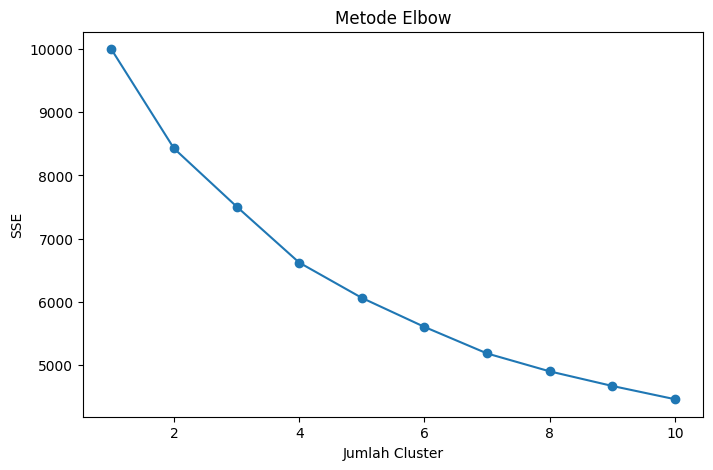

Jumlah Cluster: 2, Silhouette Score: 0.15599024938490744
Jumlah Cluster: 3, Silhouette Score: 0.13831704439770814
Jumlah Cluster: 4, Silhouette Score: 0.1479549923299134
Jumlah Cluster: 5, Silhouette Score: 0.15447588484250643
Jumlah Cluster: 6, Silhouette Score: 0.15518000788773084
Jumlah Cluster: 7, Silhouette Score: 0.16283663213714886
Jumlah Cluster: 8, Silhouette Score: 0.16641886106613718
Jumlah Cluster: 9, Silhouette Score: 0.16508448470852857
Jumlah Cluster: 10, Silhouette Score: 0.16440448009056882


In [9]:
from sklearn.metrics import silhouette_score

# Metode Elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols])
    sse.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Metode Elbow')
plt.show()

# Menghitung Silhouette Score untuk setiap jumlah cluster
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[numerical_cols])
    score = silhouette_score(df[numerical_cols], labels)
    print(f'Jumlah Cluster: {k}, Silhouette Score: {score}')


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [10]:
# Contoh seleksi fitur (menggunakan hanya dua kolom numerik)
selected_features = ['Annual Income ($)', 'Spending Score (1-100)']
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[selected_features])

# Menambahkan label cluster baru ke dataset
df['Cluster_Selected'] = kmeans.labels_

# Evaluasi ulang dengan Silhouette Score
labels_selected = kmeans.labels_
score_selected = silhouette_score(df[selected_features], labels_selected)
print(f'Silhouette Score setelah Feature Selection: {score_selected}')


Silhouette Score setelah Feature Selection: 0.3737148756704219


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

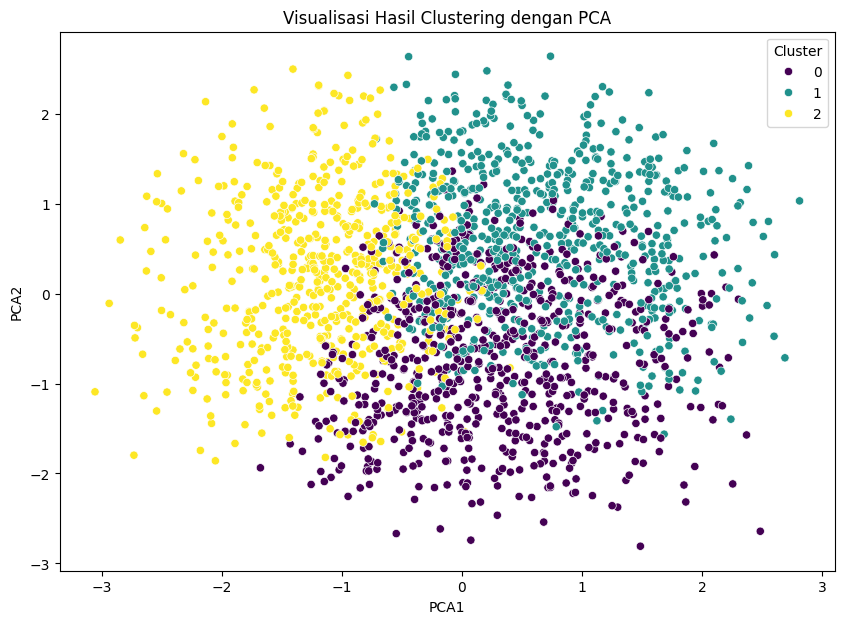

In [11]:
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[numerical_cols])
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [12]:
# Analisis distribusi fitur dalam setiap cluster
for cluster in sorted(df['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster][numerical_cols].describe())
    print("\n")


Cluster 0:
              Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
count  711.000000         711.000000              711.000000       711.000000   
mean    -0.117503           0.364560                0.943650        -0.071334   
std      1.032300           0.838238                0.540623         0.967821   
min     -1.722571          -1.852949               -0.392532        -1.046230   
25%     -1.054089          -0.318214                0.538444        -0.791207   
50%     -0.174509           0.459459                1.003932        -0.536185   
75%      0.705072           1.046199                1.397807         0.738928   
max      1.760568           1.725814                1.755875         3.289152   

       Family Size  
count   711.000000  
mean      0.280256  
std       0.949132  
min      -1.405148  
25%      -0.390051  
50%       0.117497  
75%       1.132594  
max       2.147691  


Cluster 1:
              Age  Annual Income ($)  Spending Score (1-1

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [13]:
df.to_csv('Customers_with_Clusters.csv', index=False)
